In [1]:
import argparse
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, pacf
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime
from datetime import timedelta
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools
!pip install pmdarima

from pmdarima.arima import auto_arima


In [2]:
def plot(input_file, whether_plot_trend, whether_plot_acf, whether_plot_seasonal_acf, diff):
    
# read in data
    
    df = pd.read_csv(input_file)
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)
#     print(df)

    if whether_plot_trend == True:
        plt.figure(figsize=(15,4))
        plt.plot(df.cost)
        plt.title('Project A Cost over Time') # fontsize=#
        plt.ylabel('Cost')
        for month in range(1,12):
            plt.axvline(pd.to_datetime('2022-' + str(month) + '-01'), color='k', linestyle='--', alpha=0.2) 
        n_diff = df.cost.diff()[1:]
        plt.figure(figsize=(15,4))
        plt.plot(n_diff)
        plt.title('Project A Stablized Cost over Time') # fontsize=#
        plt.ylabel('Cost')
        for month in range(1,12):
            plt.axvline(pd.to_datetime('2022-' + str(month) + '-01'), color='k', linestyle='--', alpha=0.2)             
    
    if whether_plot_acf == True:
# acf
        acf_plot = plot_acf(df.cost, lags=40)
# pacf
        pacf_plot = plot_pacf(df.cost, lags=40)

# adfuller
        adfuller_result = adfuller(df.cost)
        print('ADF Statistic: %f' % adfuller_result[0])
        print('p-value: %f' % adfuller_result[1])

      #繪製標準差
        rolling_deviations = pd.Series(dtype=float, index = df.index)
        rolling_deviations_fake = pd.Series(dtype=float, index = df.index)
        for date in rolling_deviations.index:
            #get the window ending at this data point
            window = df.loc[date - timedelta(days=5):date]


            #get the deviation within this window
            rolling_deviations[date] = window.std()
            if rolling_deviations[date] > 20:
              df.loc[date] = np.mean(df.loc[date - timedelta(days=5):date])
              print(df.loc[date])
        #get the difference in deviation between one time point and the next
        diff_rolling_deviations = rolling_deviations
        diff_rolling_deviations = diff_rolling_deviations.dropna()
        plt.figure(figsize=(10,4))
        plt.plot(diff_rolling_deviations)
        plt.title('Deviation Differences', fontsize=20)
        plt.ylabel('usage', fontsize=16)





# stablized
    n_diff = []
    # n_diff = df.cost.diff()[1:]

    for i in range(diff, len(df.cost)):
        n_diff.append(df.cost[i] - df.cost[i-30])
        
    adfuller_result = adfuller(n_diff)
    print('ADF Statistic: %f' % adfuller_result[0])
    print('p-value: %f' % adfuller_result[1])
    if whether_plot_seasonal_acf == True:
# acf after removing trend
        acf_plot = plot_acf(n_diff, lags=40)
# pacf after removing trend
        pacf_plot = plot_pacf(n_diff, lags=40)


C:\Users\user\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\user\anaconda3\lib\site-packages

ADF Statistic: -6.989692
p-value: 0.000000
cost    260.431735
Name: 2022-01-13 00:00:00, dtype: float64
cost    231.518886
Name: 2022-01-27 00:00:00, dtype: float64
cost    223.103755
Name: 2022-01-28 00:00:00, dtype: float64
cost    214.761489
Name: 2022-01-29 00:00:00, dtype: float64
cost    204.703998
Name: 2022-01-30 00:00:00, dtype: float64
cost    193.260091
Name: 2022-01-31 00:00:00, dtype: float64
cost    198.810721
Name: 2022-02-01 00:00:00, dtype: float64
cost    214.969843
Name: 2022-02-03 00:00:00, dtype: float64
cost    215.256828
Name: 2022-02-04 00:00:00, dtype: float64
cost    217.458585
Name: 2022-02-05 00:00:00, dtype: float64
cost    224.160251
Name: 2022-02-06 00:00:00, dtype: float64
cost    230.01104
Name: 2022-02-07 00:00:00, dtype: float64
cost    228.930763
Name: 2022-02-08 00:00:00, dtype: float64
cost    231.126549
Name: 2022-02-09 00:00:00, dtype: float64
cost    241.498363
Name: 2022-02-11 00:00:00, dtype: float64
cost    244.46666
Name: 2022-03-04 00:00:00

C:\Users\user\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


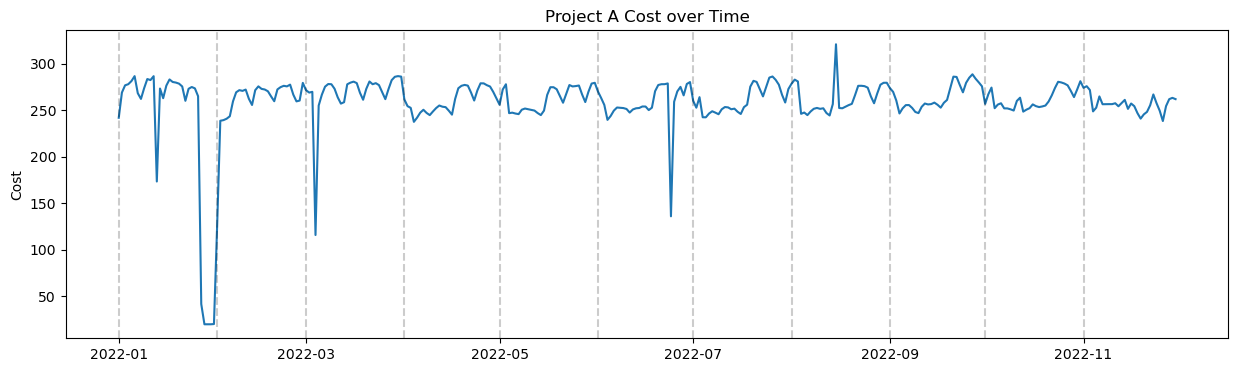

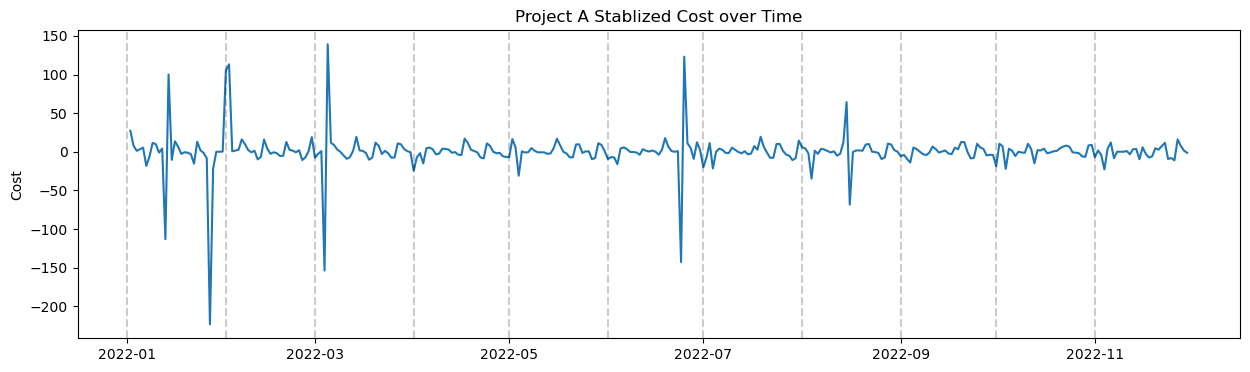

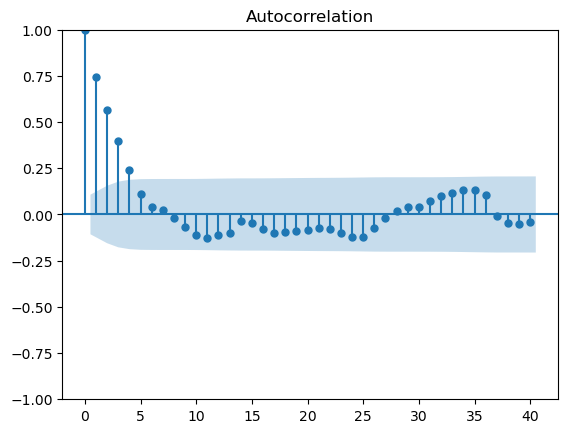

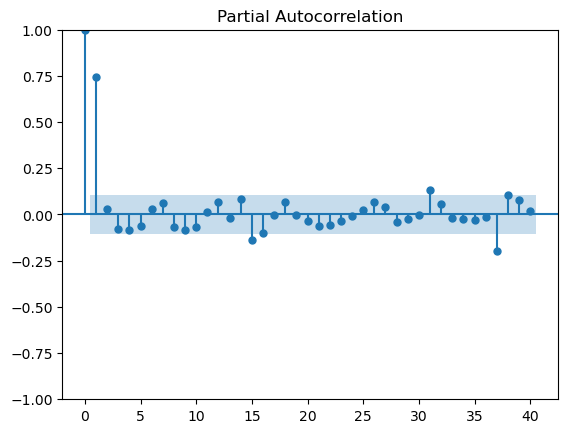

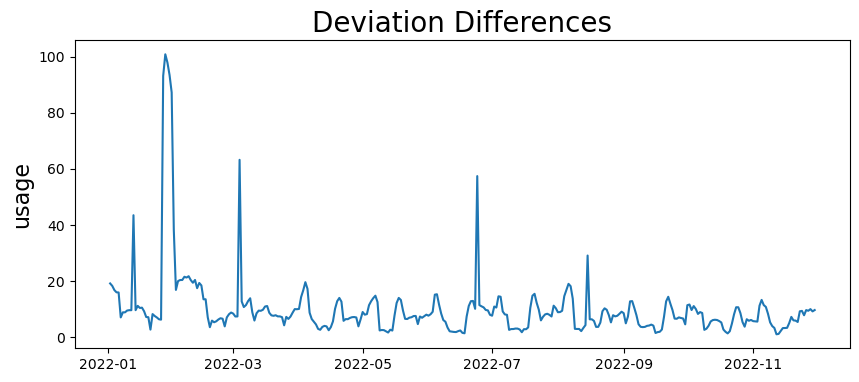

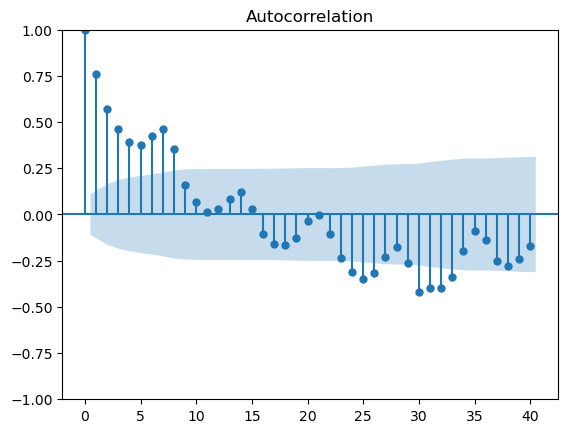

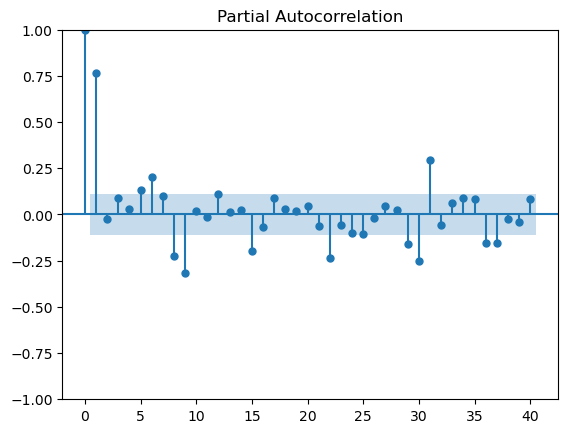

In [4]:
if __name__ == '__main__':
#     parser = argparse.ArgumentParser()
#     parser.add_argument('--project', default='a')
#     parser.add_argument('--plot', default=True)
#     args = parser.parse_args()
#     main(args.input)

    project = 'a'
    whether_plot_trend = True
    whether_plot_acf = True
    whether_plot_seasonal_acf = True
    whether_take_diff = True # b needs to be taken
    diff = 20
    plot('project_a.csv', whether_plot_trend, whether_plot_acf, whether_plot_seasonal_acf,diff)

In [5]:

def sarima_model(input_file, model_type, para):
    
# read in data
    
    df = pd.read_csv(input_file)
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)
    df2 = df.copy()
    #print(df)
    #print(df2)

    rolling_deviations = pd.Series(dtype=float, index = df.index)
    rolling_deviations_fake = pd.Series(dtype=float, index = df.index)
    for date in rolling_deviations.index:
        #get the window ending at this data point
        window = df2.loc[date - timedelta(days=5):date]


        #get the deviation within this window
        rolling_deviations[date] = window.std()
        if rolling_deviations[date] > 10:
              df2.loc[date] = np.mean(df2.loc[date - timedelta(days=5):date])
        

# train_test_split
    train_end = datetime(2022, 11, 1)
    val_end = datetime(2022, 11, 1)
    test_end = datetime(2022, 12, 1)
    
    train_data = df2[:train_end]
    val_data = df2[train_end+timedelta(days=1):val_end]
    test_data = df[val_end+timedelta(days=1):test_end]


# construct model
    best_RMSE = 1000
    best_para = []
    if model_type == 'arima':
        model = ARIMA(train_data, order=(para[0][0], para[0][1], para[0][2]))
        model_fit = model.fit()
        # print(model_fit.summary())
        
    if model_type == 'sarima':
        model = SARIMAX(train_data, order=(para[0][0], para[0][1], para[0][2]), seasonal_order=(para[1][0], para[1][1], para[1][2], para[1][3]))
        model_fit = model.fit()
        # print(model_fit.summary())
        
    if model_type == 'auto_sarima':
        Arima_model=auto_arima(train_data, start_p=1, start_q=1, max_p=10, max_q=2, start_P=7, start_Q=0,max_order = 10, max_P=10, max_Q=5, m=15, seasonal=True, trace=True, d=0, D=1 ,max_d = 1, max_D = 1,error_action='warn', suppress_warnings=True, random_state = 20, n_fits=30)
        Arima_model.summary()
        forecast_values, forecast_conf_int = Arima_model.forecast(len(test_data))
# predict test data
    
    best_model = SARIMAX(train_data, order=(para[0][0], para[0][1], para[0][2]), seasonal_order=(para[1][0], para[1][1], para[1][2], para[1][3]))
    best_model_fit = best_model.fit()
    
    pred_start_date = test_data.index[0]
    pred_end_date = test_data.index[-1]
    
    predictions = pd.DataFrame(best_model_fit.predict(start=pred_start_date, end=pred_end_date))
    predictions = predictions.rename(columns={'predicted_mean': 'cost'})
    predictions.index.name = 'date'
    residuals = test_data - predictions
    print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))
    
# plot residuals
    plt.figure(figsize=(15,4))
    plt.plot(residuals)
    plt.title('Residuals from Model') # fontsize=#
    plt.ylabel('Error')
    plt.axhline(0, color='r', linestyle='--', alpha=0.2)

# ground truth vs. prediction
    plt.figure(figsize=(15,4))
    plt.plot(test_data)
    plt.plot(predictions)

    plt.legend(('Data', 'Predictions'))

    plt.title('Project Cost over Time')
    plt.ylabel('Cost')

# # rolling prediction
    origin_data = test_data.copy()
    rolling_predictions = predictions.copy()
    # 計算train_data中所有的deviation
    for train_end in rolling_predictions.index:
        train_data = df2[:train_end-timedelta(days=1)]


        model = SARIMAX(train_data, order=(para[0][0], para[0][1], para[0][2]), seasonal_order=(para[1][0], para[1][1], para[1][2], para[1][3]))
        model_fit = model.fit()

        pred = model_fit.forecast()
        rolling_predictions[rolling_predictions.index == train_end] = pred

    rolling_residuals = origin_data - rolling_predictions
    print('Test Root Mean Squared Error (Rolling Forecasting):', np.sqrt(np.mean(rolling_residuals**2)))

    plt.figure(figsize=(15,4))
    plt.plot(origin_data)
    plt.plot(rolling_predictions)

    plt.legend(('Data', 'Predictions'))

    plt.title('rolling base Project Cost over Time')
    plt.ylabel('Cost')

In [10]:
project = 'a'
model_type = 'auto_sarima'
para = [[1,0,0], [5, 1, 0, 7]] # arima:[[ar, i, ma]], sarima:[[ar, i, ma], [sar, si, sma, s]] 1,1,1,31

sarima_model('project_a.csv', model_type, para)

C:\Users\user\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\user\anaconda3\lib\site-p

C:\Users\user\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(7,1,0)[15] intercept   : AIC=1979.530, Time=32.64 sec
 ARIMA(0,0,0)(0,1,0)[15] intercept   : AIC=2523.082, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[15] intercept   : AIC=2052.562, Time=0.37 sec
 ARIMA(0,0,1)(0,1,1)[15] intercept   : AIC=inf, Time=0.94 sec
 ARIMA(0,0,0)(0,1,0)[15]             : AIC=2521.175, Time=0.03 sec
 ARIMA(1,0,1)(6,1,0)[15] intercept   : AIC=1989.493, Time=21.18 sec
 ARIMA(1,0,1)(8,1,0)[15] intercept   : AIC=1980.531, Time=49.71 sec


KeyboardInterrupt: 

In [6]:

def sarima_model(input_file, model_type, para):
    
# read in data
    
    df = pd.read_csv(input_file)
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)
    df2 = df.copy()
    #print(df)
    #print(df2)

    rolling_deviations = pd.Series(dtype=float, index = df.index)
    rolling_deviations_fake = pd.Series(dtype=float, index = df.index)
    for date in rolling_deviations.index:
        #get the window ending at this data point
        window = df2.loc[date - timedelta(days=5):date]


        #get the deviation within this window
        rolling_deviations[date] = window.std()
        if rolling_deviations[date] > 10:
              df2.loc[date] = np.mean(df2.loc[date - timedelta(days=5):date])
        

# train_test_split
    train_end = datetime(2022, 10, 16)
    val_end = datetime(2022, 10, 16)
    test_end = datetime(2022, 12, 1)
    
    train_data = df2[:train_end]
    val_data = df2[train_end+timedelta(days=1):val_end]
    test_data = df[val_end+timedelta(days=1):test_end]


# construct model
    best_RMSE = 1000
    best_para = []
    if model_type == 'arima':
        model = ARIMA(train_data, order=(para[0][0], para[0][1], para[0][2]))
        model_fit = model.fit()
        # print(model_fit.summary())
        
    if model_type == 'sarima':
        model = SARIMAX(train_data, order=(para[0][0], para[0][1], para[0][2]), seasonal_order=(para[1][0], para[1][1], para[1][2], para[1][3]))
        model_fit = model.fit()
        # print(model_fit.summary())
        
    if model_type == 'auto_sarima':
        Arima_model=auto_arima(train_data, start_p=1, start_q=1, max_p=10, max_q=2, start_P=7, start_Q=0,max_order = 10, max_P=10, max_Q=5, m=15, seasonal=True, trace=True, d=0, D=1 ,max_d = 1, max_D = 1,error_action='warn', suppress_warnings=True, random_state = 20, n_fits=30)
        Arima_model.summary()
        forecast_values, forecast_conf_int = Arima_model.forecast(len(test_data))
# predict test data
    
    best_model = SARIMAX(train_data, order=(para[0][0], para[0][1], para[0][2]), seasonal_order=(para[1][0], para[1][1], para[1][2], para[1][3]))
    best_model_fit = best_model.fit()
    
    pred_start_date = test_data.index[0]
    pred_end_date = test_data.index[-1]
    
    predictions = pd.DataFrame(best_model_fit.predict(start=pred_start_date, end=pred_end_date))
    predictions = predictions.rename(columns={'predicted_mean': 'cost'})
    predictions.index.name = 'date'
    residuals = test_data - predictions
    print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))
    
# plot residuals
    plt.figure(figsize=(15,4))
    plt.plot(residuals)
    plt.title('Residuals from Model') # fontsize=#
    plt.ylabel('Error')
    plt.axhline(0, color='r', linestyle='--', alpha=0.2)

# ground truth vs. prediction
    plt.figure(figsize=(15,4))
    plt.plot(test_data)
    plt.plot(predictions)

    plt.legend(('Data', 'Predictions'))

    plt.title('Project Cost over Time')
    plt.ylabel('Cost')

# # rolling prediction
    origin_data = test_data.copy()
    rolling_predictions = predictions.copy()

    for train_end in rolling_predictions.index:
        train_data = df2[train_end-timedelta(days=60):train_end-timedelta(days=1)]


        model = SARIMAX(train_data, order=(para[0][0], para[0][1], para[0][2]), seasonal_order=(para[1][0], para[1][1], para[1][2], para[1][3]))
        model_fit = model.fit()

        pred = model_fit.forecast()
        rolling_predictions[rolling_predictions.index == train_end] = pred

    rolling_residuals = origin_data - rolling_predictions
    print('Test Root Mean Squared Error (Rolling Forecasting):', np.sqrt(np.mean(rolling_residuals**2)))

    plt.figure(figsize=(15,4))
    plt.plot(origin_data)
    plt.plot(rolling_predictions)

    plt.legend(('Data', 'Predictions'))

    plt.title('rolling base Project Cost over Time')
    plt.ylabel('Cost')

In [ ]:
project = 'a'
model_type = 'sarima'
para = [[1,0,0],[5,1,0,7]] # arima:[[ar, i, ma]], sarima:[[ar, i, ma], [sar, si, sma, s]]
#(1,0,0),(0,1,2,31)11.77
#(1,0,0),(0,1,2,6)11.31
#(3,0,2),(5,1,0,6)9.91
#(3,0,2),(5,1,0,12)9.92
#(1,0,0),(5,1,0,7)8.88

sarima_model('project_a.csv', model_type, para)

In [ ]:
#(3,0,2),(5,1,0,7)6.45
#[2,0,1],[7,1,0,15]5.69

## 自動選出m(週期)，再將m丟進去跑auto_arima輸出最佳參數組合

沒有進行異常值平滑化之結果

In [12]:
# 1. 挑windows rmse最低的

df = pd.read_csv('project_c.csv')

# Train and test data

df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df2 = df.copy()

train_end = datetime(2022, 8, 16)
val_end = datetime(2022, 9, 16)
test_end = datetime(2022, 12, 1)
    
train_data = df[:train_end]
val_data = df[train_end+timedelta(days=1):val_end]
test_data = df[val_end+timedelta(days=1):test_end]
prediction = []


window = [45,50, 60, 65,75,80, 85,90]

for each in window:
    prediction = []
    for i in range(31):
        rolling_train = df[train_end-timedelta(days=each): train_end+timedelta(days=i)]
    

        # Model Training，只在第一次用auto_arima篩出最佳參數
        
        if i == 0:
            if each < 66:
                pacf_x, confint = pacf(rolling_train.cost, nlags=21, alpha=0.05)  # 因為這邊至少要是windows/2，所以我改成21
                seasonality = None
                for k in range(2, 22):
                    if abs(confint[k][0]) > 0.23:  # 這個THRESHOLD要依據PACF的帶狀上下限作調整
                        seasonality = k
            else:
                pacf_x, confint = pacf(rolling_train.cost, nlags=35, alpha=0.05)  
                seasonality = None  
                print(confint)

                for k in range(2, 32):
                    if abs(confint[k][0]) > 0.23:
                        seasonality = k
    

            print(k)

            Arima_model=auto_arima(rolling_train, start_p=1, max_p=10, max_q=10,max_order = 10, max_P=10, max_Q=5, m=k, seasonal=True, trace=True, d=0, D=1 ,max_d = 2, max_D = 2,error_action='warn', suppress_warnings=True, random_state = 20, n_fits=20)
            para = Arima_model.get_params()
            param1 = para['order'][0]  
            param2 = para['order'][1]  
            param3 = para['order'][2]  
            param4 = para['seasonal_order'][0] 
            param5 = para['seasonal_order'][1]  
            param6 = para['seasonal_order'][2]  
            param7 = para['seasonal_order'][3]  
        # Prediction
        # Prediction
        model = SARIMAX(rolling_train, order=(param1, param2, param3), seasonal_order=(param4, param5, param6, param7))
        model_fit = model.fit()

        pred = model_fit.forecast()
        prediction.append(pred[0])

    print("-------------------------------------------",each,"--------------------------------------------------------------------")
    
    # Model Evaluation
    from sklearn.metrics import mean_squared_error as MSE
    rmse = np.sqrt(MSE(val_data.cost, prediction))
    print(each, "RMSE: %f" %(rmse))


eeeeeeeeeeeeeeeeeee -0.35958685526288614
hahahahhaahahaha -0.4993074888966956
hahahahhaahahaha -0.35958685526288614
hahahahhaahahaha -0.41147435059307547
hahahahhaahahaha -0.42699352851165645
hahahahhaahahaha -0.39631159479422534
hahahahhaahahaha -0.44219474260332675
hahahahhaahahaha -0.3056666590998624
hahahahhaahahaha -0.5125600665476482
hahahahhaahahaha -0.3704250878668573
hahahahhaahahaha -0.469500961991028
hahahahhaahahaha -0.540678145510904
hahahahhaahahaha -0.47481438432440276
hahahahhaahahaha -0.44851310930703103
hahahahhaahahaha -0.3792938738224399
hahahahhaahahaha -0.4675139997464392
hahahahhaahahaha -0.6444048920988313
hahahahhaahahaha -0.8174986488730691
hahahahhaahahaha -1.0047174880468297
21
Performing stepwise search to minimize aic
 ARIMA(1,0,2)(1,1,1)[21] intercept   : AIC=inf, Time=1.02 sec
 ARIMA(0,0,0)(0,1,0)[21] intercept   : AIC=198.121, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[21] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,0,1)(0,1,1)[21] intercept   : AIC=inf, Time

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init

------------------------------------------- 45 --------------------------------------------------------------------
45 RMSE: 4.254741
eeeeeeeeeeeeeeeeeee -0.3972067711706711
hahahahhaahahaha -0.49337404753915964
hahahahhaahahaha -0.3972067711706711
hahahahhaahahaha -0.4365925559336652
hahahahhaahahaha -0.44117807837318956
hahahahhaahahaha -0.4346115155222544
hahahahhaahahaha -0.39201809688643074
hahahahhaahahaha -0.5010507935190066
hahahahhaahahaha -0.4362264851103371
hahahahhaahahaha -0.4516743574094875
hahahahhaahahaha -0.2726472963397199
hahahahhaahahaha -0.574406595782206
hahahahhaahahaha -0.5190894918579573
hahahahhaahahaha -0.6231176712125248
hahahahhaahahaha -0.6821790462391881
hahahahhaahahaha -0.34760464879194225
hahahahhaahahaha -0.4300748647721485
21
Performing stepwise search to minimize aic
 ARIMA(1,0,2)(1,1,1)[21] intercept   : AIC=192.572, Time=0.40 sec
 ARIMA(0,0,0)(0,1,0)[21] intercept   : AIC=233.886, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[21] intercept   : AIC=188.394, T

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init

------------------------------------------- 50 --------------------------------------------------------------------
50 RMSE: 4.978531
eeeeeeeeeeeeeeeeeee -0.31948122197026907
hahahahhaahahaha -0.450532583298485
hahahahhaahahaha -0.31948122197026907
hahahahhaahahaha -0.41758943638465157
hahahahhaahahaha -0.38447325373468755
hahahahhaahahaha -0.3744884656425941
hahahahhaahahaha -0.4588541223909447
hahahahhaahahaha -0.28825763220058187
hahahahhaahahaha -0.448223682598063
hahahahhaahahaha -0.3905822730394146
hahahahhaahahaha -0.2827342183958076
hahahahhaahahaha -0.6108904427242676
hahahahhaahahaha -0.5090362682153105
hahahahhaahahaha -0.41432249423898804
hahahahhaahahaha -0.4322387619120005
hahahahhaahahaha -0.5201156433219292
hahahahhaahahaha -0.5435007209220348
hahahahhaahahaha -0.8829000291476365
21
Performing stepwise search to minimize aic
 ARIMA(1,0,2)(1,1,1)[21] intercept   : AIC=246.744, Time=0.48 sec
 ARIMA(0,0,0)(0,1,0)[21] intercept   : AIC=304.208, Time=0.03 sec
 ARIMA(1,0,0)(1

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init

------------------------------------------- 60 --------------------------------------------------------------------
60 RMSE: 4.968917
eeeeeeeeeeeeeeeeeee -0.33209106392874177
hahahahhaahahaha -0.438919416046912
hahahahhaahahaha -0.33209106392874177
hahahahhaahahaha -0.3446274267982694
hahahahhaahahaha -0.3944927654853473
hahahahhaahahaha -0.35733664597188214
hahahahhaahahaha -0.42278700339705383
hahahahhaahahaha -0.3191948032800764
hahahahhaahahaha -0.44656304973574296
hahahahhaahahaha -0.38948268672591857
hahahahhaahahaha -0.5961215002422473
hahahahhaahahaha -0.468426780456463
hahahahhaahahaha -0.5254228270218949
hahahahhaahahaha -0.5167412721836634
hahahahhaahahaha -0.4194907976499813
hahahahhaahahaha -0.5630680184257342
hahahahhaahahaha -0.6947826742411652
21
Performing stepwise search to minimize aic
 ARIMA(1,0,2)(1,1,1)[21] intercept   : AIC=272.343, Time=0.63 sec
 ARIMA(0,0,0)(0,1,0)[21] intercept   : AIC=338.027, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[21] intercept   : AIC=267.946, 

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init

------------------------------------------- 65 --------------------------------------------------------------------
65 RMSE: 4.967806
[[ 1.          1.        ]
 [ 0.65884684  1.10849342]
 [-0.41765509  0.03199149]
 [-0.31366092  0.13598566]
 [-0.32233044  0.12731614]
 [-0.38144008  0.06820649]
 [-0.32690245  0.12274412]
 [-0.34810334  0.10154323]
 [-0.27053522  0.17911136]
 [-0.04144519  0.40820138]
 [-0.39686859  0.05277799]
 [-0.34156329  0.10808328]
 [-0.23977649  0.20987009]
 [-0.56189924 -0.11225266]
 [-0.40561112  0.04403546]
 [-0.36208466  0.08756191]
 [-0.03869549  0.41095109]
 [-0.188502    0.26114458]
 [-0.48062754 -0.03098096]
 [-0.35683393  0.09281265]
 [-0.48850452 -0.03885795]
 [-0.59013513 -0.14048855]
 [-0.52104216 -0.07139558]
 [-0.31049366  0.13915292]
 [ 0.44048171  0.89012829]
 [ 0.6854017   1.13504828]
 [ 4.54504791  4.99469449]
 [-1.36633507 -0.91668849]
 [-2.02387404 -1.57422746]
 [ 1.19275567  1.64240225]
 [ 0.27587988  0.72552646]
 [ 0.35499523  0.8046418 ]
 [

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init

------------------------------------------- 75 --------------------------------------------------------------------
75 RMSE: 1.330567
[[ 1.00000000e+00  1.00000000e+00]
 [ 6.35068497e-01  1.07061605e+00]
 [-4.16140476e-01  1.94070759e-02]
 [-3.35308990e-01  1.00238562e-01]
 [-3.55885011e-01  7.96625416e-02]
 [-2.00929596e-01  2.34617956e-01]
 [-3.42700343e-01  9.28472095e-02]
 [-3.70624243e-01  6.49233090e-02]
 [-2.62212043e-01  1.73335509e-01]
 [-6.47272184e-02  3.70820334e-01]
 [-3.84926059e-01  5.06214936e-02]
 [-3.54032493e-01  8.15150587e-02]
 [-2.89740486e-01  1.45807066e-01]
 [-4.16637949e-01  1.89096030e-02]
 [-4.34297010e-01  1.25054178e-03]
 [-4.62454330e-01 -2.69067774e-02]
 [ 3.31916275e-02  4.68739180e-01]
 [-3.07933703e-01  1.27613849e-01]
 [-4.63146876e-01 -2.75993243e-02]
 [-5.77925125e-01 -1.42377573e-01]
 [-3.10527751e-01  1.25019801e-01]
 [-5.25570462e-01 -9.00229099e-02]
 [-8.05451626e-01 -3.69904074e-01]
 [-7.19325422e-01 -2.83777870e-01]
 [ 4.88705555e-02  4.84418

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init

------------------------------------------- 80 --------------------------------------------------------------------
80 RMSE: 1.330567
[[ 1.00000000e+00  1.00000000e+00]
 [ 6.65510112e-01  1.08820682e+00]
 [-4.28649950e-01 -5.95324655e-03]
 [-3.13715698e-01  1.08981006e-01]
 [-3.29323171e-01  9.33735326e-02]
 [-3.75706738e-01  4.69899655e-02]
 [-3.33816618e-01  8.88800860e-02]
 [-4.00169406e-01  2.25272977e-02]
 [-2.49697228e-01  1.72999476e-01]
 [ 1.71397299e-03  4.24410677e-01]
 [-3.28196180e-01  9.45005233e-02]
 [-3.41042565e-01  8.16541386e-02]
 [-2.67674949e-01  1.55021755e-01]
 [-5.12917574e-01 -9.02208705e-02]
 [-4.33977875e-01 -1.12811717e-02]
 [-4.95028751e-01 -7.23320475e-02]
 [ 3.92847300e-02  4.61981434e-01]
 [-1.66339772e-01  2.56356932e-01]
 [-3.82401971e-01  4.02947331e-02]
 [-5.38340145e-01 -1.15643441e-01]
 [-4.24430721e-01 -1.73401704e-03]
 [-6.38869639e-01 -2.16172936e-01]
 [-9.23156226e-01 -5.00459522e-01]
 [-1.25461844e+00 -8.31921741e-01]
 [-6.78830220e-02  3.54813

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init

------------------------------------------- 85 --------------------------------------------------------------------
85 RMSE: 1.330567
[[ 1.00000000e+00  1.00000000e+00]
 [ 6.66105996e-01  1.07702610e+00]
 [-3.71175152e-01  3.97449535e-02]
 [-3.33116745e-01  7.78033604e-02]
 [-2.72156630e-01  1.38763476e-01]
 [-3.75734958e-01  3.51851466e-02]
 [-3.15978534e-01  9.49415714e-02]
 [-3.91014742e-01  1.99053633e-02]
 [-2.53157899e-01  1.57762206e-01]
 [ 1.01649681e-02  4.21085073e-01]
 [-3.80811419e-01  3.01086862e-02]
 [-2.26440266e-01  1.84479839e-01]
 [-3.41990317e-01  6.89297880e-02]
 [-5.11331285e-01 -1.00411180e-01]
 [-4.32203064e-01 -2.12829590e-02]
 [-4.09393782e-01  1.52632342e-03]
 [ 3.69177704e-02  4.47837875e-01]
 [-1.31679779e-01  2.79240326e-01]
 [-3.90209978e-01  2.07101275e-02]
 [-4.15566105e-01 -4.64600014e-03]
 [-4.73708496e-01 -6.27883907e-02]
 [-5.74859775e-01 -1.63939670e-01]
 [-7.35755482e-01 -3.24835377e-01]
 [-5.12291925e-01 -1.01371820e-01]
 [ 7.31674022e-01  1.14259

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init

------------------------------------------- 90 --------------------------------------------------------------------
90 RMSE: 1.330567


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


用前90天的資料來預測10/15後的天資料

In [15]:
df = pd.read_csv('project_c.csv')

# Train and test data

df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
prediction = []
train_end = datetime(2022, 10, 15)
test_end = datetime(2022, 12, 1)
    
train_data = df[:train_end]
test_data = df[train_end+timedelta(days=1):test_end]

for i in range(len(test_data)):
    rolling_train = df[train_end-timedelta(days=90): train_end+timedelta(days=i)]


        # Model Training，只在第一次用auto_arima篩出最佳參數
        
    if i % 15 == 0:
        pacf_x, confint = pacf(rolling_train.cost, nlags=35, alpha=0.05)
        seasonality = None
        #print(confint)
    
        for k in range(2, 32):
            if abs(confint[k][0]) > 0.23:
                seasonality = k
                

        Arima_model=auto_arima(rolling_train, start_p=1, max_p=10, max_q=10,max_order = 10, max_P=10, max_Q=5, m=k, seasonal=True, trace=True, d=0, D=1 ,max_d = 2, max_D = 2,error_action='warn', suppress_warnings=True, random_state = 20, n_fits=15)
        para = Arima_model.get_params()
        print(para)
        param1 = para['order'][0]  
        param2 = para['order'][1]  
        param3 = para['order'][2]  
        param4 = para['seasonal_order'][0] 
        param5 = para['seasonal_order'][1]  
        param6 = para['seasonal_order'][2]  
        param7 = para['seasonal_order'][3]  
        # Prediction
    model = SARIMAX(rolling_train, order=(param1, param2, param3), seasonal_order=(param4, param5, param6, param7))
    model_fit = model.fit()

    pred = model_fit.forecast()
    print(pred[0])

    prediction.append(pred[0])

rmse = np.sqrt(MSE(test_data.cost, prediction))
print("RMSE: %f" %(rmse))



Performing stepwise search to minimize aic
 ARIMA(1,0,2)(1,1,1)[31] intercept   : AIC=inf, Time=3.02 sec
 ARIMA(0,0,0)(0,1,0)[31] intercept   : AIC=315.276, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[31] intercept   : AIC=292.199, Time=0.31 sec
 ARIMA(0,0,1)(0,1,1)[31] intercept   : AIC=302.021, Time=0.39 sec
 ARIMA(0,0,0)(0,1,0)[31]             : AIC=329.823, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[31] intercept   : AIC=290.305, Time=0.09 sec
 ARIMA(1,0,0)(0,1,1)[31] intercept   : AIC=292.200, Time=0.27 sec
 ARIMA(1,0,0)(1,1,1)[31] intercept   : AIC=inf, Time=1.71 sec
 ARIMA(2,0,0)(0,1,0)[31] intercept   : AIC=289.818, Time=0.12 sec
 ARIMA(2,0,0)(1,1,0)[31] intercept   : AIC=291.770, Time=0.44 sec
 ARIMA(2,0,0)(0,1,1)[31] intercept   : AIC=291.770, Time=0.32 sec
 ARIMA(2,0,0)(1,1,1)[31] intercept   : AIC=inf, Time=2.69 sec
 ARIMA(3,0,0)(0,1,0)[31] intercept   : AIC=291.547, Time=0.17 sec
 ARIMA(2,0,1)(0,1,0)[31] intercept   : AIC=291.416, Time=0.22 sec
 ARIMA(1,0,1)(0,1,0)[31] intercept   : AIC=28

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init

91.76372530093512
96.02542798615409
97.0766372083578


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init

96.74640992735092
96.1480934617116
95.69676286811914


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init

91.05956682032034
87.68343107275419


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


91.15239879193985
95.17370565977022


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


91.9359270666312
90.50114498557319
89.98099939622139
Performing stepwise search to minimize aic


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


 ARIMA(1,0,2)(1,1,1)[31] intercept   : AIC=inf, Time=2.98 sec
 ARIMA(0,0,0)(0,1,0)[31] intercept   : AIC=409.202, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[31] intercept   : AIC=361.327, Time=0.37 sec
 ARIMA(0,0,1)(0,1,1)[31] intercept   : AIC=inf, Time=1.53 sec
 ARIMA(0,0,0)(0,1,0)[31]             : AIC=411.793, Time=0.05 sec
 ARIMA(1,0,0)(0,1,0)[31] intercept   : AIC=362.879, Time=0.11 sec
 ARIMA(1,0,0)(2,1,0)[31] intercept   : AIC=inf, Time=2.27 sec
 ARIMA(1,0,0)(1,1,1)[31] intercept   : AIC=inf, Time=1.50 sec
 ARIMA(1,0,0)(0,1,1)[31] intercept   : AIC=360.795, Time=0.59 sec
 ARIMA(1,0,0)(0,1,2)[31] intercept   : AIC=inf, Time=3.93 sec
 ARIMA(1,0,0)(1,1,2)[31] intercept   : AIC=inf, Time=5.27 sec
 ARIMA(0,0,0)(0,1,1)[31] intercept   : AIC=inf, Time=1.01 sec
 ARIMA(2,0,0)(0,1,1)[31] intercept   : AIC=360.250, Time=0.81 sec
 ARIMA(2,0,0)(0,1,0)[31] intercept   : AIC=362.671, Time=0.18 sec
 ARIMA(2,0,0)(1,1,1)[31] intercept   : AIC=inf, Time=3.02 sec
 ARIMA(2,0,0)(0,1,2)[31] intercept   : AIC

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


89.81541438884433


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


97.61392686087291


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


108.84462584378302


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


109.26811576852582


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


107.40010642061664


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


107.75292924463288


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


107.97206948963922


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


110.09250871046184


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


107.22254385557835


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


101.13805098132694


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


102.50938140985843


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


102.71232126207356


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


102.15538990965864


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


101.56746528704247


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


102.23790692912404
Performing stepwise search to minimize aic
 ARIMA(1,0,2)(1,1,1)[31] intercept   : AIC=inf, Time=4.26 sec
 ARIMA(0,0,0)(0,1,0)[31] intercept   : AIC=479.976, Time=0.06 sec
 ARIMA(1,0,0)(1,1,0)[31] intercept   : AIC=435.973, Time=0.56 sec
 ARIMA(0,0,1)(0,1,1)[31] intercept   : AIC=452.778, Time=0.61 sec
 ARIMA(0,0,0)(0,1,0)[31]             : AIC=484.859, Time=0.06 sec
 ARIMA(1,0,0)(0,1,0)[31] intercept   : AIC=434.581, Time=0.13 sec
 ARIMA(1,0,0)(0,1,1)[31] intercept   : AIC=435.964, Time=0.50 sec
 ARIMA(1,0,0)(1,1,1)[31] intercept   : AIC=inf, Time=2.42 sec
 ARIMA(2,0,0)(0,1,0)[31] intercept   : AIC=434.811, Time=0.18 sec
 ARIMA(1,0,1)(0,1,0)[31] intercept   : AIC=434.052, Time=0.26 sec
 ARIMA(1,0,1)(1,1,0)[31] intercept   : AIC=435.616, Time=0.68 sec
 ARIMA(1,0,1)(0,1,1)[31] intercept   : AIC=435.611, Time=0.74 sec
 ARIMA(1,0,1)(1,1,1)[31] intercept   : AIC=inf, Time=3.48 sec
 ARIMA(0,0,1)(0,1,0)[31] intercept   : AIC=451.474, Time=0.12 sec
 ARIMA(2,0,1)(0,1,0)[31] i

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


100.17565798461824
96.08425260197393


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


97.45784272352145
96.37500104536048


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


95.81156523531685
95.72098741413272


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


96.33431404307602
97.66147591299203


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


92.85127065599839
90.29999114496086


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


89.68535330953475
89.45948995762511


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


89.63843228101332
90.27876808396684
Performing stepwise search to minimize aic


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


 ARIMA(1,0,2)(1,1,1)[31] intercept   : AIC=inf, Time=6.16 sec
 ARIMA(0,0,0)(0,1,0)[31] intercept   : AIC=546.692, Time=0.05 sec
 ARIMA(1,0,0)(1,1,0)[31] intercept   : AIC=497.518, Time=0.53 sec
 ARIMA(0,0,1)(0,1,1)[31] intercept   : AIC=514.558, Time=0.55 sec
 ARIMA(0,0,0)(0,1,0)[31]             : AIC=554.060, Time=0.04 sec
 ARIMA(1,0,0)(0,1,0)[31] intercept   : AIC=495.616, Time=0.11 sec
 ARIMA(1,0,0)(0,1,1)[31] intercept   : AIC=497.524, Time=0.39 sec
 ARIMA(1,0,0)(1,1,1)[31] intercept   : AIC=inf, Time=2.72 sec
 ARIMA(2,0,0)(0,1,0)[31] intercept   : AIC=495.942, Time=0.20 sec
 ARIMA(1,0,1)(0,1,0)[31] intercept   : AIC=495.265, Time=0.24 sec
 ARIMA(1,0,1)(1,1,0)[31] intercept   : AIC=497.241, Time=0.84 sec
 ARIMA(1,0,1)(0,1,1)[31] intercept   : AIC=497.243, Time=0.82 sec
 ARIMA(1,0,1)(1,1,1)[31] intercept   : AIC=inf, Time=4.56 sec
 ARIMA(0,0,1)(0,1,0)[31] intercept   : AIC=513.934, Time=0.15 sec
 ARIMA(2,0,1)(0,1,0)[31] intercept   : AIC=496.433, Time=0.35 sec
 ARIMA(1,0,2)(0,1,0)[3

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


         date        cost
0  2022-10-16  102.526131
1  2022-10-17   98.938052
2  2022-10-18   91.763725
3  2022-10-19   96.025428
4  2022-10-20   97.076637
5  2022-10-21   96.746410
6  2022-10-22   96.148093
7  2022-10-23   95.696763
8  2022-10-24   91.059567
9  2022-10-25   87.683431
10 2022-10-26   91.152399
11 2022-10-27   95.173706
12 2022-10-28   91.935927
13 2022-10-29   90.501145
14 2022-10-30   89.980999
15 2022-10-31   89.815414
16 2022-11-01   97.613927
17 2022-11-02  108.844626
18 2022-11-03  109.268116
19 2022-11-04  107.400106
20 2022-11-05  107.752929
21 2022-11-06  107.972069
22 2022-11-07  110.092509
23 2022-11-08  107.222544
24 2022-11-09  101.138051
25 2022-11-10  102.509381
26 2022-11-11  102.712321
27 2022-11-12  102.155390
28 2022-11-13  101.567465
29 2022-11-14  102.237907
30 2022-11-15  102.523444
31 2022-11-16  100.175658
32 2022-11-17   96.084253
33 2022-11-18   97.457843
34 2022-11-19   96.375001
35 2022-11-20   95.811565
36 2022-11-21   95.720987
37 2022-11-2

Text(0, 0.5, 'Cost')

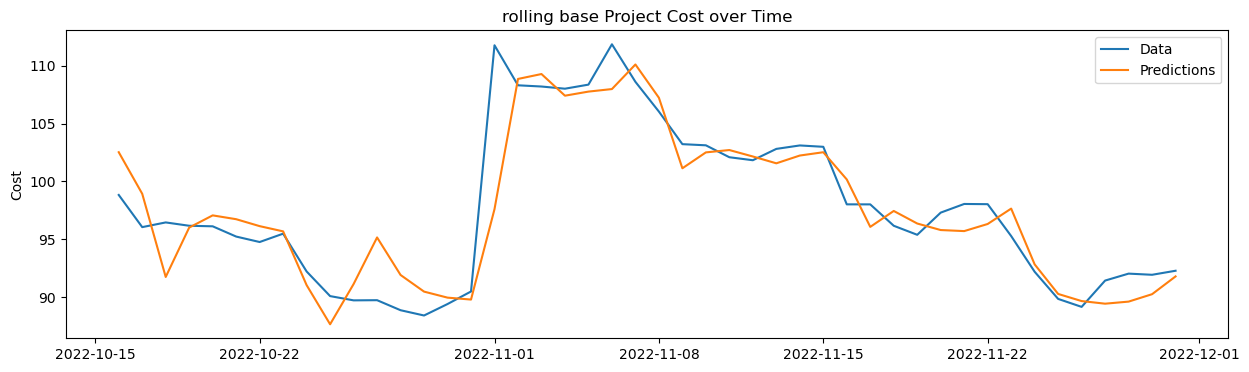

In [16]:
# 建立日期範圍，從 2022/10/16 到 2022/11/30
dates = pd.date_range(start='2022-10-16', end='2022-11-30', freq='D')
dates = pd.to_datetime(dates)
#print(test_data)
# 建立 DataFrame，將預測結果和日期作為列
df = pd.DataFrame({'date': dates, 'cost': prediction})
df['date'] = pd.to_datetime(df['date'])

print(df)

plt.figure(figsize=(15,4))
plt.plot(test_data)
plt.plot(df['date'], df['cost'])

plt.legend(('Data', 'Predictions'))

plt.title('rolling base Project Cost over Time')
plt.ylabel('Cost')


